In [1]:
import glob
import os

In [40]:
glob.glob("..\\..\\datasets\\*")

['..\\..\\datasets\\ChatDoctor-HealthCareMagic-100k',
 '..\\..\\datasets\\ChatDoctor-iCliniq',
 '..\\..\\datasets\\liveqa_medical_trec2017',
 '..\\..\\datasets\\medical-eval-sphere',
 '..\\..\\datasets\\medical_meadow_cord19',
 '..\\..\\datasets\\medical_meadow_medical_flashcards',
 '..\\..\\datasets\\medical_meadow_mediqa',
 '..\\..\\datasets\\medical_meadow_medqa',
 '..\\..\\datasets\\medical_meadow_mmmlu',
 '..\\..\\datasets\\medical_meadow_wikidoc',
 '..\\..\\datasets\\mediQ',
 '..\\..\\datasets\\MediQ_AskDocs',
 '..\\..\\datasets\\med_qa',
 '..\\..\\datasets\\pubmed_qa',
 '..\\..\\datasets\\README.md']

In [149]:
# final_dataset should contain fields: dataset_name, id_message, message
# message includes: role -> system, user, chatbot
# each role will have a content field
save_path = "..\\..\\datasets\\final_dataset\\"
file_path = "..\\..\\datasets\\final_dataset\\medical_dataset.jsonl"
ex = {"dataset_name": "dataset_name", "id_message": 0, "message": [{"role": "system", "content": "content"}, {"role": "user", "content": "content"}, {"role": "chatbot", "content": "content"}]}

In [ ]:
# run this to see example of the final_dataset.jsonl

# with open(file_path, "w", encoding="utf-8") as file:
#     file.writelines("{\"dataset_name\": \"dataset_name\", \"id_message\": 0, \"message\": [{\"role\": \"system\", \"content\": \"content\"}, {\"role\": \"user\", \"content\": \"content\"}, {\"role\": \"chatbot\", \"content\": \"content\"}]}\n")
#     file.writelines("{\"dataset_name\": \"dataset_name\", \"id_message\": 0, \"message\": [{\"role\": \"system\", \"content\": \"content\"}, {\"role\": \"user\", \"content\": \"content\"}, {\"role\": \"chatbot\", \"content\": \"content\"}]}\n")
# file.close()

# ChatDoctor-HealthCareMagic-100k

## Load dataset

In [21]:
dataset_path_1 = "..\\..\\datasets\\ChatDoctor-HealthCareMagic-100k\\*\\*"
glob.glob(dataset_path_1)

['..\\..\\datasets\\ChatDoctor-HealthCareMagic-100k\\data\\train-00000-of-00001-5e7cb295b9cff0bf.parquet']

In [36]:
import pyarrow
import fastparquet
import pandas as pd

data_1 = pd.read_parquet(glob.glob(dataset_path_1))
data_1.head()


,instruction,input,output
0,"If you are a doctor, please answer the medical...",I woke up this morning feeling the whole room ...,"Hi, Thank you for posting your query. The most..."
1,"If you are a doctor, please answer the medical...",My baby has been pooing 5-6 times a day for a ...,Hi... Thank you for consulting in Chat Doctor....
2,"If you are a doctor, please answer the medical...","Hello, My husband is taking Oxycodone due to a...","Hello, and I hope I can help you today.First, ..."
3,"If you are a doctor, please answer the medical...",lump under left nipple and stomach pain (male)...,HI. You have two different problems. The lump ...
4,"If you are a doctor, please answer the medical...",I have a 5 month old baby who is very congeste...,Thank you for using Chat Doctor. I would sugge...


In [148]:
print(data_1.iloc[0, 0])
print(data_1.iloc[0, 1])
print(data_1.iloc[0, 2])

If you are a doctor, please answer the medical questions based on the patient's description.
I woke up this morning feeling the whole room is spinning when i was sitting down. I went to the bathroom walking unsteadily, as i tried to focus i feel nauseous. I try to vomit but it wont come out.. After taking panadol and sleep for few hours, i still feel the same.. By the way, if i lay down or sit down, my head do not spin, only when i want to move around then i feel the whole world is spinning.. And it is normal stomach discomfort at the same time? Earlier after i relieved myself, the spinning lessen so i am not sure whether its connected or coincidences.. Thank you doc!
Hi, Thank you for posting your query. The most likely cause for your symptoms is benign paroxysmal positional vertigo (BPPV), a type of peripheral vertigo. In this condition, the most common symptom is dizziness or giddiness, which is made worse with movements. Accompanying nausea and vomiting are common. The condition is

In [110]:
print(data_1.shape)

(112165, 3)


In [ ]:
import uuid

with open(file_path, "a", encoding="utf-8") as file:
    dataset_name = "ChatDoctor-HealthCareMagic-100k"
    for idx in range(0, len(data_1)):
        id_message = str(uuid.uuid4())
        # role: system
        system_message = data_1.iloc[idx]["íntruction"]
        # role: user
        user_message = data_1.iloc[idx]["input"]
        # role: chatbot
        chatbot_message = data_1.iloc[idx]["output"]

        # write to file
        file.writelines("{\"dataset_name\": \"" + dataset_name + "\", \"id_message\": \"" + id_message + "\", \"message\": [{\"role\": \"system\", \"content\": \"" + system_message + "\"}, {\"role\": \"user\", \"content\": \"" + user_message + "\"}, {\"role\": \"chatbot\", \"content\": \"" + chatbot_message + "\"}]}\n")

file.close()

# ChatDoctor-iCliniq

In [34]:
import pandas as pd
import glob

dataset_path_2 = "..\\..\\datasets\\ChatDoctor-iCliniq\\*\\*"
glob.glob(dataset_path_2)

['..\\..\\datasets\\ChatDoctor-iCliniq\\data\\train-00000-of-00001-7f15f39e4c3a7ee9.parquet']

In [35]:
data_2 = pd.read_parquet(glob.glob(dataset_path_2))
data_2.head()

,input,answer_icliniq,answer_chatgpt,answer_chatdoctor
0,"Hello doctor,I had mumps five months ago and a...","Hello, Welcome to Chat Doctor forum. I can und...",It is possible that you still have an infectio...,1) There is no need to worry about reinfection...
1,"Hello doctor,I am trying to conceive but my hu...","Hello, Wellcome to ChatDoctor. There are few r...",Hello! Thank you for reaching out.\n\nCocaine ...,1) Cocaine use can affect fertility by causing...
2,"Hello doctor,I am currently on the Yaz contrac...",Hello. The brown discharge should be temporary...,Hello! It's not uncommon to experience some ir...,1) The brown discharge is due to the hormonal ...
3,"Hello doctor,My son aged 13 years has got his ...","Hello, Welcome to Chat Doctor forum. I have go...","As an AI language model, I am not a doctor and...","Hi, welcome to Chat Doctor forum. I understand..."
4,"Hello doctor,I just got one side of my wisdom ...",Hello. The lump is mostly a hard swelling whic...,"Hello,\n\nIt is normal to have some swelling a...","Hi, Thanks for your query. It appears that you..."


In [31]:
data_2.shape

(7321, 4)

In [152]:
print(data_2.iloc[0, 0])
print(data_2.iloc[0, 1])
print(data_2.iloc[0, 2])
print(data_2.iloc[0, 3])

Hello doctor,I had mumps five months ago and after that, I started to have an infection in my left testes. It was swollen and now it has shrunk to almost half the size of the other one. As I am sexually active, I feel a pain in each of the vas deferens after sex. If I do not have sex for days, they become sensitive. I was treated with Ceftum 500 mg, the first time I had an infection. Now my question is, is there any chance that the infection is still in my body? And, do I need to get examined for it? For the time being, please suggest some precautionary antibiotics for my relief.
Hello, Welcome to Chat Doctor forum. I can understand your concern. You had mumps and this is a viral infection known to cause an inflammation of the testis in some cases. Take care. For more information consult a sexologist online
It is possible that you still have an infection in your testes, especially if you have been experiencing pain and sensitivity in your vas deferens. It is recommended that you consul

In [153]:
import uuid

with open(file_path, "a", encoding="utf-8") as file:
    dataset_name = "ChatDoctor-iCliniq"
    for idx in range(0, len(data_2)):
        id_message = str(uuid.uuid4())
        # role: system
        system_message = "You are a helpful, polite and friendly AI assistant. Answer user questions as clearly and concisely as possible."
        # role: user
        user_message = data_2.iloc[idx]["input"]
        # role: chatbot
        chatbot_message = data_2.iloc[idx]["answer_chatdoctor"]

        # write to file
        file.writelines("{\"dataset_name\": \"" + dataset_name + "\", \"id_message\": \"" + id_message + "\", \"message\": [{\"role\": \"system\", \"content\": \"" + system_message + "\"}, {\"role\": \"user\", \"content\": \"" + user_message + "\"}, {\"role\": \"chatbot\", \"content\": \"" + chatbot_message + "\"}]}\n")

file.close()

# liveqa_medical_trec2017

In [ ]:
import pandas as pd
import glob

dataset_path_3 = "..\\..\\datasets\\liveqa_medical_trec2017\\*"
glob.glob(dataset_path_3)

['..\\..\\datasets\\liveqa_medical_trec2017\\README.md',
 '..\\..\\datasets\\liveqa_medical_trec2017\\test.jsonl',
 '..\\..\\datasets\\liveqa_medical_trec2017\\TREC2017-LiveQA-Medical-Train1.jsonl',
 '..\\..\\datasets\\liveqa_medical_trec2017\\TREC2017-LiveQA-Medical-Train2.jsonl']

In [39]:
data_3 = pd.read_json(glob.glob(dataset_path_3)[2], lines=True)
data_3.head()

,ANSWERS,SUB_QUESTION_ID,ANNOTATIONS_FOCUS,ANNOTATIONS_TYPE,SUBJECT,MESSAGE,QUESTION_ID,F_REF
0,"[{'_answerid': 'Q1-S1-A1', '_pairid': '1', '__...",Q1-S1,[cardiac amyloidosis],information,,Literature on Cardiac amyloidosis. Please let...,Q1,11373
1,"[{'_answerid': 'Q2-S1-A1', '_pairid': '3', '__...",Q2-S1,[migraine],treatment,treatment options versus migraine types,Migraine seems to be a spectrum of conditions ...,Q2,1-136434885
2,"[{'_answerid': 'Q3-S1-A1', '_pairid': '5', '__...",Q3-S1,[pyridoxine],contraindication,,DO I USE PYRIDOXINE TABLETS EVEN IF IM PREGNANT?,Q3,1-123453375
3,"[{'_answerid': 'Q4-S1-A1', '_pairid': '6', '__...",Q4-S1,[cramp],cause,cramp,i have lymphoma what causes cramp after chemo ...,Q4,1-118260435
4,"[{'_answerid': 'Q5-S1-A1', '_pairid': '7', '__...",Q5-S1,[macular degeneration],treatment,Retina,I wonder of new research and testing on macula...,Q5,1-132032443


In [41]:
# read second dataset and concatenate
data_4 = pd.read_json(glob.glob(dataset_path_3)[3], lines=True)
data_3 = pd.concat([data_3, data_4], ignore_index=True)
data_3.head()

,ANSWERS,SUB_QUESTION_ID,ANNOTATIONS_FOCUS,ANNOTATIONS_TYPE,SUBJECT,MESSAGE,QUESTION_ID,F_REF,ANSWER
0,"[{'_answerid': 'Q1-S1-A1', '_pairid': '1', '__...",Q1-S1,[cardiac amyloidosis],information,,Literature on Cardiac amyloidosis. Please let...,Q1,11373,NaN
1,"[{'_answerid': 'Q2-S1-A1', '_pairid': '3', '__...",Q2-S1,[migraine],treatment,treatment options versus migraine types,Migraine seems to be a spectrum of conditions ...,Q2,1-136434885,NaN
2,"[{'_answerid': 'Q3-S1-A1', '_pairid': '5', '__...",Q3-S1,[pyridoxine],contraindication,,DO I USE PYRIDOXINE TABLETS EVEN IF IM PREGNANT?,Q3,1-123453375,NaN
3,"[{'_answerid': 'Q4-S1-A1', '_pairid': '6', '__...",Q4-S1,[cramp],cause,cramp,i have lymphoma what causes cramp after chemo ...,Q4,1-118260435,NaN
4,"[{'_answerid': 'Q5-S1-A1', '_pairid': '7', '__...",Q5-S1,[macular degeneration],treatment,Retina,I wonder of new research and testing on macula...,Q5,1-132032443,NaN


In [42]:
data_3.shape

(500, 9)

In [155]:
print(data_3.iloc[0, 0])
print(data_3.iloc[0, 1])
print(data_3.iloc[0, 2])
print(data_3.iloc[0, 3])
print(data_3.iloc[0, 4])
print(data_3.iloc[0, 5])
print(data_3.iloc[0, 6])
print(data_3.iloc[0, 7])
print(data_3.iloc[0, 8])

[{'_answerid': 'Q1-S1-A1', '_pairid': '1', '__text': 'Cardiac amyloidosis is a disorder caused by deposits of an abnormal protein (amyloid) in the heart tissue. These deposits make it hard for the heart to work properly.'}, {'_answerid': 'Q1-S1-A2', '_pairid': '2', '__text': 'The term "amyloidosis" refers not to a single disease but to a collection of diseases in which a protein-based infiltrate deposits in tissues as beta-pleated sheets. The subtype of the disease is determined by which protein is depositing; although dozens of subtypes have been described, most are incredibly rare or of trivial importance. This analysis will focus on the main systemic forms of amyloidosis, both of which frequently involve the heart.'}]
Q1-S1
['cardiac amyloidosis']
information

Literature on Cardiac amyloidosis.  Please let me know where I can get literature on Cardiac amyloidosis.  My uncle died yesterday from this disorder.  Since this is such a rare disorder, and to honor his memory, I would like 

In [ ]:
# pass this dataset

# medical-eval-sphere

In [44]:
import pandas as pd
import glob

dataset_path_4 = "..\\..\\datasets\\medical-eval-sphere\\*"
glob.glob(dataset_path_4)

['..\\..\\datasets\\medical-eval-sphere\\data',
 '..\\..\\datasets\\medical-eval-sphere\\README.md']

In [45]:
glob.glob("..\\..\\datasets\\medical-eval-sphere\\data\\*")

['..\\..\\datasets\\medical-eval-sphere\\data\\medical_qa_benchmark_v1.0-00000-of-00001.parquet']

In [46]:
data_4 = pd.read_parquet(glob.glob("..\\..\\datasets\\medical-eval-sphere\\data\\*")[0])
data_4.head()

,global_key,batch_id,medical_question,model_a,response_a,model_b,response_b,pair_order,annotations
0,8769e2a3-85e3-4357-97cb-de9a19e6baf0,1,Why was arsenic used to treat diseases?,biomistral-7b-dare,Arsenic was used to treat diseases due to its ...,alpacare-llama2-13b,Arsenic was used to treat diseases because it ...,biomistral-7b-dare@alpacare-llama2-13b,"{""difficulty"": {""annotator1"": ""basic"", ""annota..."
1,129b615e-e84a-484c-87a4-f7d130bc44f4,1,If a 70-year-old woman who is 5’6” tall and we...,biomistral-7b-dare,The glomerular filtration rate (GFR) is a meas...,alpacare-llama2-13b,"Yes, a weight loss of 15 pounds can potentiall...",biomistral-7b-dare@alpacare-llama2-13b,"{""difficulty"": {""annotator1"": ""advanced"", ""ann..."
2,13f07370-9abc-4f64-96c2-8b267a2e0f1f,1,How long after a catheterization done via the ...,biomistral-7b-dare,"After a catheterization done via the wrist, it...",alpacare-llama2-13b,It is generally safe to resume light resistanc...,biomistral-7b-dare@alpacare-llama2-13b,"{""difficulty"": {""annotator1"": ""intermediate"", ..."
3,d1a979f2-9bf7-46c9-a910-f793547f298e,1,What oil is good for you to cook with?,biomistral-7b-dare,Olive oil is considered one of the healthiest ...,alpacare-llama2-13b,"When it comes to cooking oil, there are severa...",biomistral-7b-dare@alpacare-llama2-13b,"{""difficulty"": {""annotator1"": ""basic"", ""annota..."
4,440c6071-ff40-4cab-a078-97709008dbaf,1,What amount of narrowing of arteries requires ...,alpacare-llama2-13b,The decision to perform angioplasty or stent p...,biomistral-7b-dare,The decision to perform angioplasty or stentin...,alpacare-llama2-13b@biomistral-7b-dare,"{""difficulty"": {""annotator1"": ""advanced"", ""ann..."


In [47]:
data_4.shape

(400, 9)

In [156]:
print(data_4.iloc[0, 0])
print(data_4.iloc[0, 1])
print(data_4.iloc[0, 2])
print(data_4.iloc[0, 3])
print(data_4.iloc[0, 4])
print(data_4.iloc[0, 5])
print(data_4.iloc[0, 6])
print(data_4.iloc[0, 7])
print(data_4.iloc[0, 8])


8769e2a3-85e3-4357-97cb-de9a19e6baf0
1
Why was arsenic used to treat diseases?
biomistral-7b-dare
Arsenic was used to treat diseases due to its antimicrobial and anti-inflammatory properties. It was also used to treat syphilis, a sexually transmitted disease. However, arsenic is now known to be a toxic substance that can cause various health problems, including cancer, heart disease, and neurological disorders.
alpacare-llama2-13b
Arsenic was used to treat diseases because it was believed to have medicinal properties and could be effective in treating certain conditions such as syphilis and intestinal worm infections. However, its use was later discontinued due to the high toxicity and potential harmful effects on the body. Today, arsenic is not used as a medication except in specific cases where other treatments have failed and under strict medical supervision.
biomistral-7b-dare@alpacare-llama2-13b
{"difficulty": {"annotator1": "basic", "annotator2": "intermediate", "llm": "basic"}, 

In [157]:
import uuid

with open(file_path, "a", encoding="utf-8") as file:
    dataset_name = "medical-eval-sphere"
    for idx in range(0, len(data_4)):
        id_message = str(uuid.uuid4())
        # role: system
        system_message = "You are a helpful, polite and friendly AI assistant. Answer user questions as clearly and concisely as possible."
        # role: user
        user_message = data_4.iloc[idx]["medical_question"]
        # role: chatbot
        chatbot_message = data_4.iloc[idx]["response_a"]

        # write to file
        file.writelines("{\"dataset_name\": \"" + dataset_name + "\", \"id_message\": \"" + id_message + "\", \"message\": [{\"role\": \"system\", \"content\": \"" + system_message + "\"}, {\"role\": \"user\", \"content\": \"" + user_message + "\"}, {\"role\": \"chatbot\", \"content\": \"" + chatbot_message + "\"}]}\n")

file.close()

# medical_meadow_cord19

In [48]:
import pandas as pd
import glob

dataset_path_5 = "..\\..\\datasets\\medical_meadow_cord19\\*"
glob.glob(dataset_path_5)

['..\\..\\datasets\\medical_meadow_cord19\\medical_meadow_cord19.json',
 '..\\..\\datasets\\medical_meadow_cord19\\README.md']

In [50]:
# this dataset is too large

# medical_meadow_medical_flashcards

In [51]:
import pandas as pd
import glob

dataset_path_6 = "..\\..\\datasets\\medical_meadow_medical_flashcards\\*"
glob.glob(dataset_path_6)

['..\\..\\datasets\\medical_meadow_medical_flashcards\\medical_meadow_wikidoc_medical_flashcards.json',
 '..\\..\\datasets\\medical_meadow_medical_flashcards\\README.md']

In [ ]:
data_6 = pd.read_json(glob.glob(dataset_path_6)[0], lines=False)
data_6.head()

,instruction,input,output
0,Answer this question truthfully,What is the relationship between very low Mg2+...,Very low Mg2+ levels correspond to low PTH lev...
1,Answer this question truthfully,What leads to genitourinary syndrome of menopa...,Low estradiol production leads to genitourinar...
2,Answer this question truthfully,What does low REM sleep latency and experienci...,Low REM sleep latency and experiencing halluci...
3,Answer this question truthfully,What are some possible causes of low PTH and h...,"PTH-independent hypercalcemia, which can be ca..."
4,Answer this question truthfully,How does the level of anti-müllerian hormone r...,The level of anti-müllerian hormone is directl...


In [164]:
data_6.shape

(33955, 3)

In [160]:
print(data_6.iloc[0, 0])
print(data_6.iloc[0, 1])
print(data_6.iloc[0, 2])

Answer this question truthfully
What is the relationship between very low Mg2+ levels, PTH levels, and Ca2+ levels?
Very low Mg2+ levels correspond to low PTH levels which in turn results in low Ca2+ levels.


In [161]:
import uuid

with open(file_path, "a", encoding="utf-8") as file:
    dataset_name = "medical_meadow_medical_flashcards"
    for idx in range(0, len(data_6)):
        id_message = str(uuid.uuid4())
        # role: system
        system_message = data_6.iloc[idx]["instruction"]
        # role: user
        user_message = data_6.iloc[idx]["input"]
        # role: chatbot
        chatbot_message = data_6.iloc[idx]["output"]

        # write to file
        file.writelines("{\"dataset_name\": \"" + dataset_name + "\", \"id_message\": \"" + id_message + "\", \"message\": [{\"role\": \"system\", \"content\": \"" + system_message + "\"}, {\"role\": \"user\", \"content\": \"" + user_message + "\"}, {\"role\": \"chatbot\", \"content\": \"" + chatbot_message + "\"}]}\n")

file.close()

# medical_meadow_mediqa

In [63]:
import pandas as pd
import glob

dataset_path_7 = "..\\..\\datasets\\medical_meadow_mediqa\\*"
glob.glob(dataset_path_7)

['..\\..\\datasets\\medical_meadow_mediqa\\medical_meadow_mediqa.json',
 '..\\..\\datasets\\medical_meadow_mediqa\\README.md']

In [162]:
data_7 = pd.read_json(glob.glob(dataset_path_7)[0], lines=False)
data_7.head()

,instruction,input,output
0,"abetalipoproteimemia hi, I would like to know ...",Bassen-Kornzweig syndrome (Exams and Tests): T...,"Abetalipoproteimemia, also known as Bassen-Kor..."
1,"abetalipoproteimemia hi, I would like to know ...",Bassen-Kornzweig syndrome: Bassen-Kornzweig sy...,"Abetalipoproteimemia, also known as Bassen-Kor..."
2,"abetalipoproteimemia hi, I would like to know ...",Abetalipoproteinemia: Abetalipoproteinemia is ...,Large doses of fat-soluble vitamins (vitamin ...
3,"abetalipoproteimemia hi, I would like to know ...",abetalipoproteinemia: Abetalipoproteinemia is ...,People with abetalipoproteinemia are not able ...
4,"about thalassemia treatment sir,my friend is s...",Sickle beta thalassemia (Treatment): Treatment...,Treatment for sickle beta thalassemia may inc...


In [165]:
data_7.shape

(2208, 3)

In [166]:
print(data_7.iloc[0, 0])
print(data_7.iloc[0, 1])
print(data_7.iloc[0, 2])

abetalipoproteimemia hi, I would like to know if there is any support for those suffering with abetalipoproteinemia? I am not diagnosed but have had many test that indicate I am suffering with this, keen to learn how to get it diagnosed and how to manage, many thanks
Bassen-Kornzweig syndrome (Exams and Tests): There may be damage to the retina of the eye (retinitis pigmentosa).   Tests that may be done to help diagnose this condition include:     - Apolipoprotein B blood test   - Blood tests to look for vitamin deficiencies (fat-soluble vitamins A, D, E, and K)   - "Burr-cell" malformation of the red cells (acanthocytosis)   - Complete blood count (CBC)   - Cholesterol studies   - Electromyography   - Eye exam   - Nerve conduction velocity   - Stool sample analysis      Genetic testing may be available for mutations in the MTP gene.
Abetalipoproteimemia, also known as Bassen-Kornzweig syndrome, is diagnosed using blood tests for Apolipoprotein B, vitamin deficiencies, malformation of 

In [ ]:
# pass this dataset

# medical_meadow_medqa

In [67]:
import pandas as pd
import glob

dataset_path_8 = "..\\..\\datasets\\medical_meadow_medqa\\*"
glob.glob(dataset_path_8)

['..\\..\\datasets\\medical_meadow_medqa\\medical_meadow_medqa.json',
 '..\\..\\datasets\\medical_meadow_medqa\\README.md']

In [167]:
data_8 = pd.read_json(glob.glob(dataset_path_8)[0], lines=False)
data_8.head()

,instruction,input,output
0,Please answer with one of the option in the br...,Q:A 23-year-old pregnant woman at 22 weeks ges...,E: Nitrofurantoin
1,Please answer with one of the option in the br...,Q:A 3-month-old baby died suddenly at night wh...,A: Placing the infant in a supine position on ...
2,Please answer with one of the option in the br...,Q:A mother brings her 3-week-old infant to the...,A: Abnormal migration of ventral pancreatic bud
3,Please answer with one of the option in the br...,Q:A pulmonary autopsy specimen from a 58-year-...,A: Thromboembolism
4,Please answer with one of the option in the br...,Q:A 20-year-old woman presents with menorrhagi...,E: Von Willebrand disease


In [168]:
data_8.shape

(10178, 3)

In [169]:
print(data_8.iloc[0, 0])
print(data_8.iloc[0, 1])
print(data_8.iloc[0, 2])

Please answer with one of the option in the bracket
Q:A 23-year-old pregnant woman at 22 weeks gestation presents with burning upon urination. She states it started 1 day ago and has been worsening despite drinking more water and taking cranberry extract. She otherwise feels well and is followed by a doctor for her pregnancy. Her temperature is 97.7°F (36.5°C), blood pressure is 122/77 mmHg, pulse is 80/min, respirations are 19/min, and oxygen saturation is 98% on room air. Physical exam is notable for an absence of costovertebral angle tenderness and a gravid uterus. Which of the following is the best treatment for this patient?? 
{'A': 'Ampicillin', 'B': 'Ceftriaxone', 'C': 'Ciprofloxacin', 'D': 'Doxycycline', 'E': 'Nitrofurantoin'},
E: Nitrofurantoin


In [170]:
import uuid

with open(file_path, "a", encoding="utf-8") as file:
    dataset_name = "medical_meadow_medqa"
    for idx in range(0, len(data_8)):
        id_message = str(uuid.uuid4())
        # role: system
        system_message = data_8.iloc[idx]["instruction"]
        # role: user
        user_message = data_8.iloc[idx]["input"]
        # role: chatbot
        chatbot_message = data_8.iloc[idx]["output"]

        # write to file
        file.writelines("{\"dataset_name\": \"" + dataset_name + "\", \"id_message\": \"" + id_message + "\", \"message\": [{\"role\": \"system\", \"content\": \"" + system_message + "\"}, {\"role\": \"user\", \"content\": \"" + user_message + "\"}, {\"role\": \"chatbot\", \"content\": \"" + chatbot_message + "\"}]}\n")

file.close()

# medical_meadow_mmmlu

In [70]:
import pandas as pd
import glob

dataset_path_9 = "..\\..\\datasets\\medical_meadow_mmmlu\\*"
glob.glob(dataset_path_9)

['..\\..\\datasets\\medical_meadow_mmmlu\\medical_meadow_mmmlu.json']

In [171]:
data_9 = pd.read_json(glob.glob(dataset_path_9)[0], lines=False)
data_9.head()

,instruction,input,output
0,Please answer the letter of option truthfully,Q:London dispersion forces are caused by? \nA:...,A
1,Please answer the letter of option truthfully,Q:Carbon has an atomic radius of 77 pm and a f...,A
2,Please answer the letter of option truthfully,Q:An unknown substance is found to have a high...,C
3,Please answer the letter of option truthfully,Q:The net ionic equation expected when solutio...,A
4,Please answer the letter of option truthfully,Q:The symbol for antimony is? \nA:W;B:Sb;C:Fe;...,B


In [172]:
data_9.shape

(3787, 3)

In [173]:
print(data_9.iloc[0, 0])
print(data_9.iloc[0, 1])
print(data_9.iloc[0, 2])

Please answer the letter of option truthfully
Q:London dispersion forces are caused by? 
A:temporary dipoles created by the position of electrons around the nuclei in a molecule;B:the three-dimensional intermolecular bonding present in all covalent substances;C:the uneven electron-to-proton ratio found on individual atoms of a molecule;D:the electronegativity differences between the different atoms in a molecule
A


In [174]:
import uuid

with open(file_path, "a", encoding="utf-8") as file:
    dataset_name = "medical_meadow_mmmlu"
    for idx in range(0, len(data_9)):
        id_message = str(uuid.uuid4())
        # role: system
        system_message = data_9.iloc[idx]["instruction"]
        # role: user
        user_message = data_9.iloc[idx]["input"]
        # role: chatbot
        chatbot_message = data_9.iloc[idx]["output"]

        # write to file
        file.writelines("{\"dataset_name\": \"" + dataset_name + "\", \"id_message\": \"" + id_message + "\", \"message\": [{\"role\": \"system\", \"content\": \"" + system_message + "\"}, {\"role\": \"user\", \"content\": \"" + user_message + "\"}, {\"role\": \"chatbot\", \"content\": \"" + chatbot_message + "\"}]}\n")

file.close()

# medical_meadow_wikidoc

In [73]:
import pandas as pd
import glob

dataset_path_10 = "..\\..\\datasets\\medical_meadow_wikidoc\\*"
glob.glob(dataset_path_10)

['..\\..\\datasets\\medical_meadow_wikidoc\\medical_meadow_wikidoc.json',
 '..\\..\\datasets\\medical_meadow_wikidoc\\README.md']

In [176]:
data_10 = pd.read_json(glob.glob(dataset_path_10)[0], lines=False)
data_10.head()

,instruction,input,output
0,Answer this question truthfully,Can you provide an overview of the lung's squa...,Squamous cell carcinoma of the lung may be cla...
1,Answer this question truthfully,"What does ""Clear: cell"" mean?",Clear cell tumors are part of the surface epit...
2,Answer this question truthfully,Can you provide me with information regarding ...,Two Japanese scientists commenced research int...
3,Answer this question truthfully,What are the historical background and symptom...,Symptoms of vulvovaginitis caused by Candida s...
4,Answer this question truthfully,"What does the ""Hypotension: Resident Survival ...",Hypotension is the term for low blood pressure...


In [178]:
data_10.shape

(10000, 3)

In [179]:
print(data_10.iloc[0, 0])
print(data_10.iloc[0, 1])
print(data_10.iloc[0, 2])

Answer this question truthfully
Can you provide an overview of the lung's squamous cell carcinoma?
Squamous cell carcinoma of the lung may be classified according to the WHO histological classification system into 4 main types: papillary, clear cell, small cell, and basaloid.


In [180]:
import uuid

with open(file_path, "a", encoding="utf-8") as file:
    dataset_name = "medical_meadow_wikidoc"
    for idx in range(0, len(data_10)):
        id_message = str(uuid.uuid4())
        # role: system
        system_message = "You are an AI chatbot assistant trained in medical knowledge, your task is to answer questions accurately and completely for the question"
        # role: user
        user_message = data_10.iloc[idx]["input"]
        # role: chatbot
        chatbot_message = data_10.iloc[idx]["output"]

        # write to file
        file.writelines("{\"dataset_name\": \"" + dataset_name + "\", \"id_message\": \"" + id_message + "\", \"message\": [{\"role\": \"system\", \"content\": \"" + system_message + "\"}, {\"role\": \"user\", \"content\": \"" + user_message + "\"}, {\"role\": \"chatbot\", \"content\": \"" + chatbot_message + "\"}]}\n")

file.close()

# mediQ

In [82]:
import pandas as pd
import glob

dataset_path_11 = "..\\..\\datasets\\mediQ\\*"
glob.glob(dataset_path_11)

['..\\..\\datasets\\mediQ\\medqa_dev_convo.jsonl',
 '..\\..\\datasets\\mediQ\\medqa_test_convo.jsonl',
 '..\\..\\datasets\\mediQ\\README.md']

In [83]:
# read train1 and train 2, then concatenate
data_11 = pd.read_json(glob.glob(dataset_path_11)[0], lines=True)
data_12 = pd.read_json(glob.glob(dataset_path_11)[1], lines=True)
data_11 = pd.concat([data_11, data_12], ignore_index=True)
data_11.head()

,id,question,context,context_len,options,answer,answer_idx,explanation,patient,facts_old,atomic_facts
0,0,The mechanism of action of the medication give...,[A 21-year-old sexually active male complains ...,3,"{'A': 'Gentamicin', 'B': 'Ciprofloxacin', 'C':...",Ceftriaxone,C,,"{'gender': 'Male', 'age': '21 years old', 'spe...","[1. Patient is a 21-year-old male., 2. Patient...",[1. A culture of the joint fluid shows a bacte...
1,1,Which of the following is the most likely diag...,[A 5-year-old girl is brought to the emergency...,14,"{'A': 'Cyclic vomiting syndrome', 'B': 'Gastro...",Cyclic vomiting syndrome,A,,"{'gender': 'Female', 'age': '5 years old', 'sp...",[1. A 5-year-old girl is brought to the emerge...,[1. The patient has had 6–8 episodes of biliou...
2,2,Which of the following is the best course of t...,[A 40-year-old woman presents with difficulty ...,8,"{'A': 'Diazepam', 'B': 'Paroxetine', 'C': 'Zol...",Trazodone,D,,"{'gender': 'Female', 'age': '40 years old', 's...","[1. Patient is a 40-year-old woman., 2. Patien...",[1. The patient has trouble falling asleep des...
3,3,Which of the following is the next best step i...,[A 37-year-old female with a history of type I...,4,"{'A': 'Obtain an abdominal CT scan', 'B': 'Obt...",Obtain a urine analysis and urine culture,B,,"{'gender': 'Female', 'age': '37 years old', 's...",[1. A 37-year-old female presents to the emerg...,"[1. The patient reports pain with urination., ..."
4,4,Which of the following should be treated first...,[A 19-year-old boy presents with confusion and...,9,"{'A': 'Hypoperfusion', 'B': 'Hyperglycemia', '...",Hypoperfusion,A,,"{'gender': 'Male', 'age': '19', 'specialties':...","[1. Patient is 19 years old., 2. Patient prese...",[1. The patient's mother noticed a change in t...


In [79]:
data_11.shape

(500, 9)

In [182]:
idx = 1
print(data_11.iloc[idx, 0])
print(data_11.iloc[idx, 1])
print(data_11.iloc[idx, 2])
print(data_11.iloc[idx, 3])
print(data_11.iloc[idx, 4])
print(data_11.iloc[idx, 5])
print(data_11.iloc[idx, 6])
print(data_11.iloc[idx, 7])
print(data_11.iloc[idx, 8])
print(data_11.iloc[idx, 9])
print(data_11.iloc[idx, 10])

1
Which of the following is the most likely diagnosis?
['A 5-year-old girl is brought to the emergency department by her mother because of multiple episodes of nausea and vomiting that last about 2 hours.', 'During this period, she has had 6–8 episodes of bilious vomiting and abdominal pain.', 'The vomiting was preceded by fatigue.', 'The girl feels well between these episodes.', 'She has missed several days of school and has been hospitalized 2 times during the past 6 months for dehydration due to similar episodes of vomiting and nausea.', 'The patient has lived with her mother since her parents divorced 8 months ago.', 'Her immunizations are up-to-date.', 'She is at the 60th percentile for height and 30th percentile for weight.', 'She appears emaciated.', 'Her temperature is 36.8°C (98.8°F), pulse is 99/min, and blood pressure is 82/52 mm Hg.', 'Examination shows dry mucous membranes.', 'The lungs are clear to auscultation.', 'Abdominal examination shows a soft abdomen with mild diff

In [ ]:
# pass this dataset

# MediQ_AskDocs (original)

In [200]:
import pandas as pd
import glob

dataset_path_12 = "..\\..\\datasets\\MediQ_AskDocs\\*"
glob.glob(dataset_path_12)

['..\\..\\datasets\\MediQ_AskDocs\\original',
 '..\\..\\datasets\\MediQ_AskDocs\\README.md',
 '..\\..\\datasets\\MediQ_AskDocs\\synthetic']

In [201]:
glob.glob("..\\..\\datasets\\MediQ_AskDocs\\original\\*")

['..\\..\\datasets\\MediQ_AskDocs\\original\\test.jsonl',
 '..\\..\\datasets\\MediQ_AskDocs\\original\\train.jsonl',
 '..\\..\\datasets\\MediQ_AskDocs\\original\\validation.jsonl']

In [202]:
glob.glob("..\\..\\datasets\\MediQ_AskDocs\\synthetic\\*")

['..\\..\\datasets\\MediQ_AskDocs\\synthetic\\train.jsonl',
 '..\\..\\datasets\\MediQ_AskDocs\\synthetic\\validation.jsonl']

In [208]:
glob.glob(dataset_path_12)[0] + "\\train.jsonl"

'..\\..\\datasets\\MediQ_AskDocs\\original\\train.jsonl'

In [203]:
# read data train and validation, then concatenate
data_12 = pd.read_json(glob.glob(dataset_path_12)[0] + "\\train.jsonl", lines=True)
data_13 = pd.read_json(glob.glob(dataset_path_12)[0] + "\\validation.jsonl", lines=True)
data_12 = pd.concat([data_12, data_13], ignore_index=True)
data_12.head()

,id,system,messages,context,question
0,t_f9lux5s-0-c0-q0,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'am i (17f) being...","[{'role': 'user', 'content': 'am i (17f) being...","[{'role': 'assistant', 'content': 'Ask your do..."
1,t_cvkbr58-0-c0-q0,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'Husband deterior...","[{'role': 'user', 'content': 'Husband deterior...","[{'role': 'assistant', 'content': 'Hey, how's ..."
2,t_cn7mvmu-0-c0-q0,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'Embarrassing Pro...","[{'role': 'user', 'content': 'Embarrassing Pro...","[{'role': 'assistant', 'content': 'Are you cur..."
3,t_cy54g9n-0-c0-q1,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'Can my doctor fo...","[{'role': 'user', 'content': 'Can my doctor fo...","[{'role': 'assistant', 'content': 'In any case..."
4,t_e9qbjfd-0-c0-q0,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'Is this seriousl...","[{'role': 'user', 'content': 'Is this seriousl...","[{'role': 'assistant', 'content': 'why can’t y..."


In [204]:
data_12.shape

(23210, 5)

In [183]:
idx = 1
print(data_12.iloc[idx, 0])
print(data_12.iloc[idx, 1])
print(data_12.iloc[idx, 2])
print(data_12.iloc[idx, 3])
print(data_12.iloc[idx, 4])

t_cvkbr58-0-c0-q0
[{'role': 'system', 'content': 'You are a medical doctor trying to interct with the patient to seek additional information about their case before making a clinical decision. Based on your understanding of basic and clinical science, medical knowledge, and mechanisms underlying health, disease, patient care, and modes of therapy, ask a follow up question. Base your answer on the current and standard practices referenced in medical guidelines.\nTask: You will be given some initial patient information and a patient inquiry, and you should ask a follow-up question to the patient. The question should be bite-sized, NOT ask for too much at once, and NOT repeat what has already been asked. Respond with the atomic question and NOTHING ELSE.'}]
[{'role': 'user', 'content': 'Husband deteriorating before my eyes, doctors at a loss, no one will help; Reddit docs, I need you.\nPertinent facts\n\n**Age**: 35\n\n**Sex**: Male\n\n**Height**: 5\'6" (168cm)\n\n**Weight**: ~150lbs, has

In [ ]:
# pass this dataset

# MediQ_AskDocs (synthetic)

In [205]:
import pandas as pd
import glob

dataset_path_13 = "..\\..\\datasets\\MediQ_AskDocs\\synthetic\\*"
glob.glob(dataset_path_13)

['..\\..\\datasets\\MediQ_AskDocs\\synthetic\\train.jsonl',
 '..\\..\\datasets\\MediQ_AskDocs\\synthetic\\validation.jsonl']

In [206]:
# read train and validation, then concatenate
data_13 = pd.read_json(glob.glob(dataset_path_13)[0], lines=True)
data_14 = pd.read_json(glob.glob(dataset_path_13)[1], lines=True)
data_13 = pd.concat([data_13, data_14], ignore_index=True)
data_13.head()

,id,system,messages,context,question
0,t_cgryn56-0-c0-q4_clarity,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'Morning sickness...","[{'role': 'user', 'content': 'Morning sickness...","[{'role': 'assistant', 'content': 'Can you tel..."
1,t_cvu1b1m-0-c0-q1_original,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'Absence of Vas D...","[{'role': 'user', 'content': 'Absence of Vas D...","[{'role': 'assistant', 'content': 'May I also ..."
2,t_dpgon84-0-c0-q0_clarity,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'What are you sup...","[{'role': 'user', 'content': 'What are you sup...","[{'role': 'assistant', 'content': 'Could you t..."
3,t_fbbmk0q-0-c0-q1_original,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': '(for Psychiatris...","[{'role': 'user', 'content': '(for Psychiatris...","[{'role': 'assistant', 'content': 'What does r..."
4,t_cllc5sm-0-c4-q0_relevance,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'Excessive supple...","[{'role': 'user', 'content': 'Excessive supple...","[{'role': 'assistant', 'content': 'Given the p..."


In [207]:
data_13.shape

(31241, 5)

In [184]:
idx = 1
print(data_13.iloc[idx, 0])
print(data_13.iloc[idx, 1])
print(data_13.iloc[idx, 2])
print(data_13.iloc[idx, 3])
print(data_13.iloc[idx, 4])

t_cvu1b1m-0-c0-q1_original
[{'role': 'system', 'content': 'You are a medical doctor trying to interct with the patient to seek additional information about their case before making a clinical decision. Based on your understanding of basic and clinical science, medical knowledge, and mechanisms underlying health, disease, patient care, and modes of therapy, ask a follow up question. Base your answer on the current and standard practices referenced in medical guidelines.\nTask: You will be given some initial patient information and a patient inquiry, and you should ask a follow-up question to the patient. The question should be bite-sized, NOT ask for too much at once, and NOT repeat what has already been asked. Respond with the atomic question and NOTHING ELSE.'}]
[{'role': 'user', 'content': 'Absence of Vas Deferens\nI am 26M, 5\'7" around 180LBS Caucasian and was born with Penoscrotal inversion, Chordee, hypospadious, and intersexed. I was Karyotyped XY. I had several reconstructive s

In [ ]:
# pass this dataset

# pubmed_qa

In [105]:
import pandas as pd
import glob

dataset_path_14 = "..\\..\\datasets\\MediQ_AskDocs\\original\\*"
glob.glob(dataset_path_14)

['..\\..\\datasets\\MediQ_AskDocs\\original\\test.jsonl',
 '..\\..\\datasets\\MediQ_AskDocs\\original\\train.jsonl',
 '..\\..\\datasets\\MediQ_AskDocs\\original\\validation.jsonl']

In [107]:
# read all json and then concatenate
data_14 = pd.read_json(glob.glob(dataset_path_14)[0], lines=True)
data_15 = pd.read_json(glob.glob(dataset_path_14)[1], lines=True)
data_16 = pd.read_json(glob.glob(dataset_path_14)[2], lines=True)
data_14 = pd.concat([data_14, data_15, data_16], ignore_index=True)
data_14.head()

,id,system,messages,context,question
0,t_dpon6tw-0-c2-q0,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'How long does it...","[{'role': 'user', 'content': 'How long does it...","[{'role': 'assistant', 'content': 'Did the str..."
1,t_dmx7gg8-0-c2-q0,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'Sharp Pain in Lo...","[{'role': 'user', 'content': 'Sharp Pain in Lo...","[{'role': 'assistant', 'content': 'Are you sti..."
2,t_clpjlg6-0-c0-q0,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'How many abortio...","[{'role': 'user', 'content': 'How many abortio...","[{'role': 'assistant', 'content': 'Why hasn't ..."
3,t_dpxkqwp-0-c0-q0,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'Passed out yeste...","[{'role': 'user', 'content': 'Passed out yeste...","[{'role': 'assistant', 'content': 'Can you rel..."
4,t_ctrpx71-0-c0-q0,"[{'role': 'system', 'content': 'You are a medi...","[{'role': 'user', 'content': 'Withdrawal sympt...","[{'role': 'user', 'content': 'Withdrawal sympt...","[{'role': 'assistant', 'content': 'How old are..."


In [108]:
data_14.shape

(23830, 5)

In [185]:
idx = 1
print(data_14.iloc[idx, 0])
print(data_14.iloc[idx, 1])
print(data_14.iloc[idx, 2])
print(data_14.iloc[idx, 3])
print(data_14.iloc[idx, 4])

t_dmx7gg8-0-c2-q0
[{'role': 'system', 'content': 'You are a medical doctor trying to interct with the patient to seek additional information about their case before making a clinical decision. Based on your understanding of basic and clinical science, medical knowledge, and mechanisms underlying health, disease, patient care, and modes of therapy, ask a follow up question. Base your answer on the current and standard practices referenced in medical guidelines.\nTask: You will be given some initial patient information and a patient inquiry, and you should ask a follow-up question to the patient. The question should be bite-sized, NOT ask for too much at once, and NOT repeat what has already been asked. Respond with the atomic question and NOTHING ELSE.'}]
[{'role': 'user', 'content': 'Sharp Pain in Lower Back While Peeing\nI am an American 22/F, 5\' 7" 160 lbs. I have noticed about once a month or so, for the last year, when I pee sometimes I have a sharp stabbing pain in my lower back/

In [193]:
data_14.iloc[idx]["messages"][0]["content"]

"27 year old male medical student, attempted auto fellatio on a soft bed and 'cracked' back - LBP x 3 days\nYeah so I'm an idiot.  Anyway, LBP x 3 days, at first it was almost too uncomfortable for me to be out of bed, today it's just feeling like a typical sprain-  it actually seems to be improving but I am paranoid about injury/disease like any good medical student, so wanted to know when pain should resolve, if taking a couple advil a day and chilling out is the best advice, and any other self-treatment tips"

In [196]:
import uuid

with open(file_path, "a", encoding="utf-8") as file:
    dataset_name = "MediQ_AskDocs"
    for idx in range(0, len(data_14)):
        id_message = str(uuid.uuid4())
        # role: system
        system_message = data_14.iloc[idx]["system"][0]["content"]
        # role: user
        user_message = data_14.iloc[idx]["context"][0]["content"]
        # role: chatbot
        chatbot_message = data_14.iloc[idx]["question"][0]["content"]

        # write to file
        file.writelines("{\"dataset_name\": \"" + dataset_name + "\", \"id_message\": \"" + id_message + "\", \"message\": [{\"role\": \"system\", \"content\": \"" + system_message + "\"}, {\"role\": \"user\", \"content\": \"" + user_message + "\"}, {\"role\": \"chatbot\", \"content\": \"" + chatbot_message + "\"}]}\n")

file.close()        

In [197]:
# open file_path, read and count lines
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()
    print("Number of lines in the file:", len(lines))
file.close()

Number of lines in the file: 546996


# Summary

In [ ]:
['..\\..\\datasets\\ChatDoctor-HealthCareMagic-100k',
 '..\\..\\datasets\\ChatDoctor-iCliniq',
 '..\\..\\datasets\\liveqa_medical_trec2017',
 '..\\..\\datasets\\medical-eval-sphere',
 '..\\..\\datasets\\medical_meadow_cord19',
 '..\\..\\datasets\\medical_meadow_medical_flashcards',
 '..\\..\\datasets\\medical_meadow_mediqa',
 '..\\..\\datasets\\medical_meadow_medqa',
 '..\\..\\datasets\\medical_meadow_mmmlu',
 '..\\..\\datasets\\medical_meadow_wikidoc',
 '..\\..\\datasets\\mediQ',
 '..\\..\\datasets\\MediQ_AskDocs',
 '..\\..\\datasets\\med_qa',
 '..\\..\\datasets\\pubmed_qa',
 '..\\..\\datasets\\README.md']

In [ ]:
x = []
x.append(data_1.shape[0])
x.append(data_2.shape[0])
x.append(data_3.shape[0])
x.append(data_4.shape[0])
x.append(data_6.shape[0])
x.append(data_7.shape[0])
x.append(data_8.shape[0])
x.append(data_9.shape[0])
x.append(data_10.shape[0])
x.append(data_11.shape[0])
x.append(data_12.shape[0])
x.append(data_13.shape[0])
x.append(data_14.shape[0])

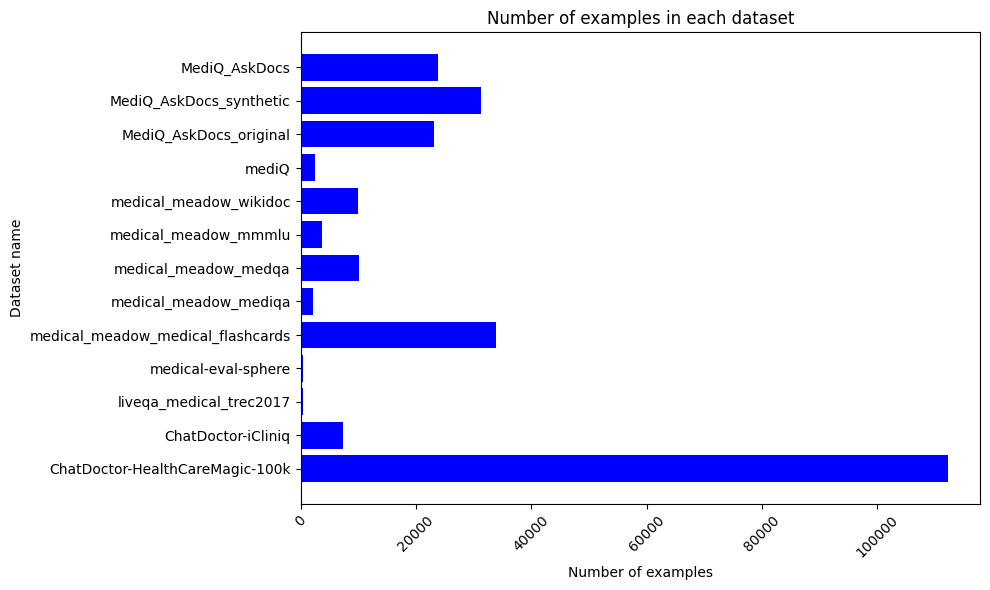

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = [
    data_1.shape[0],
    data_2.shape[0],
    data_3.shape[0],
    data_4.shape[0],
    data_6.shape[0],
    data_7.shape[0],
    data_8.shape[0],
    data_9.shape[0],
    data_10.shape[0],
    data_11.shape[0],
    data_12.shape[0],
    data_13.shape[0],
    data_14.shape[0]
]
y = [
    "ChatDoctor-HealthCareMagic-100k",
    "ChatDoctor-iCliniq",
    "liveqa_medical_trec2017 (pass)",
    "medical-eval-sphere",
    "medical_meadow_medical_flashcards",
    "medical_meadow_mediqa (pass)",
    "medical_meadow_medqa",
    "medical_meadow_mmmlu",
    "medical_meadow_wikidoc",
    "mediQ (pass)",
    "MediQ_AskDocs_original",
    "MediQ_AskDocs_synthetic",
    "MediQ_AskDocs (pass)"
]
plt.figure(figsize=(10, 6))
plt.barh(y, x, color="blue")
plt.xlabel("Number of examples")
plt.ylabel("Dataset name")
plt.title("Number of examples in each dataset")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()